In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder
from prophet import Prophet
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [2]:
train = pd.read_csv("C:/Users/saivi/Downloads/ML AND DL PROJECTS/Train.csv",encoding="ISO-8859-1")
test = pd.read_csv("C:/Users/saivi/Downloads/ML AND DL PROJECTS/Test.csv",encoding="ISO-8859-1")

In [3]:
train.head()

,sessionId,custId,date,channelGrouping,visitStartTime,visitNumber,timeSinceLastVisit,browser,operatingSystem,isMobile,...,adContent,adwordsClickInfo.page,adwordsClickInfo.slot,adwordsClickInfo.gclId,adwordsClickInfo.adNetworkType,adwordsClickInfo.isVideoAd,pageviews,bounces,newVisits,revenue
0,200000120,1795,2017-04-25,Social,1493117200,1,0,Chrome,Windows,0,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,0.0
1,400000140,1797,2016-09-04,Social,1473037945,1,0,Safari,Macintosh,0,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,0.0
2,600000160,1799,2016-12-29,Organic Search,1483011213,1,0,Chrome,Windows,0,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,0.0
3,700000170,1800,2016-08-22,Social,1471890172,1,0,Safari,Macintosh,0,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,0.0
4,800000180,1801,2017-05-18,Direct,1495146428,1,0,Chrome,Android,1,...,NaN,NaN,NaN,NaN,NaN,NaN,6.0,NaN,1.0,0.0


In [4]:
test.head()

,sessionId,custId,date,channelGrouping,visitStartTime,visitNumber,timeSinceLastVisit,browser,operatingSystem,isMobile,...,referralPath,adContent,adwordsClickInfo.page,adwordsClickInfo.slot,adwordsClickInfo.gclId,adwordsClickInfo.adNetworkType,adwordsClickInfo.isVideoAd,pageviews,bounces,newVisits
0,100000110,1794,2016-10-29,Social,1477775021,1,0,Chrome,Windows,0,...,/yt/about/pt-BR/,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0
1,300000130,1796,2016-08-10,Social,1470869296,1,0,Chrome,Windows,0,...,/yt/about/,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0
2,500000150,1798,2017-07-17,Organic Search,1500305542,1,0,Chrome,Windows,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,1.0
3,500000250,1798,2017-07-17,Organic Search,1500322111,2,16569,Chrome,Windows,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN
4,900000190,1802,2016-10-09,Social,1476003570,1,0,Safari,Macintosh,0,...,/yt/about/,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0


In [5]:
def preprocess(df):
    df['date'] = pd.to_datetime(df['date'])
    
    if 'revenue' in df.columns:
        df['revenue'] = pd.to_numeric(df['revenue'], errors='coerce').fillna(0)
    else:
        df['revenue'] = 0  # Add a dummy revenue column for uniform processing

    for col in ['pageviews', 'bounces', 'newVisits']:
        if col in df.columns:
            df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0)
        else:
            df[col] = 0

    if 'isMobile' in df.columns:
        df['isMobile'] = df['isMobile'].fillna(0)
    else:
        df['isMobile'] = 0

    df.fillna("missing", inplace=True)
    return df
train = preprocess(train)
test = preprocess(test)
train.head()

,sessionId,custId,date,channelGrouping,visitStartTime,visitNumber,timeSinceLastVisit,browser,operatingSystem,isMobile,...,adContent,adwordsClickInfo.page,adwordsClickInfo.slot,adwordsClickInfo.gclId,adwordsClickInfo.adNetworkType,adwordsClickInfo.isVideoAd,pageviews,bounces,newVisits,revenue
0,200000120,1795,2017-04-25,Social,1493117200,1,0,Chrome,Windows,0,...,missing,missing,missing,missing,missing,missing,1.0,1.0,1.0,0.0
1,400000140,1797,2016-09-04,Social,1473037945,1,0,Safari,Macintosh,0,...,missing,missing,missing,missing,missing,missing,1.0,1.0,1.0,0.0
2,600000160,1799,2016-12-29,Organic Search,1483011213,1,0,Chrome,Windows,0,...,missing,missing,missing,missing,missing,missing,1.0,1.0,1.0,0.0
3,700000170,1800,2016-08-22,Social,1471890172,1,0,Safari,Macintosh,0,...,missing,missing,missing,missing,missing,missing,1.0,1.0,1.0,0.0
4,800000180,1801,2017-05-18,Direct,1495146428,1,0,Chrome,Android,1,...,missing,missing,missing,missing,missing,missing,6.0,0.0,1.0,0.0


In [6]:
test.head()

,sessionId,custId,date,channelGrouping,visitStartTime,visitNumber,timeSinceLastVisit,browser,operatingSystem,isMobile,...,adContent,adwordsClickInfo.page,adwordsClickInfo.slot,adwordsClickInfo.gclId,adwordsClickInfo.adNetworkType,adwordsClickInfo.isVideoAd,pageviews,bounces,newVisits,revenue
0,100000110,1794,2016-10-29,Social,1477775021,1,0,Chrome,Windows,0,...,missing,missing,missing,missing,missing,missing,1.0,1.0,1.0,0
1,300000130,1796,2016-08-10,Social,1470869296,1,0,Chrome,Windows,0,...,missing,missing,missing,missing,missing,missing,1.0,1.0,1.0,0
2,500000150,1798,2017-07-17,Organic Search,1500305542,1,0,Chrome,Windows,0,...,missing,missing,missing,missing,missing,missing,5.0,0.0,1.0,0
3,500000250,1798,2017-07-17,Organic Search,1500322111,2,16569,Chrome,Windows,0,...,missing,missing,missing,missing,missing,missing,3.0,0.0,0.0,0
4,900000190,1802,2016-10-09,Social,1476003570,1,0,Safari,Macintosh,0,...,missing,missing,missing,missing,missing,missing,1.0,1.0,1.0,0


In [7]:
def smooth_revenue(df):
    df['revenue_original'] = df['revenue']
    df['revenue'] = df.groupby('custId')['revenue'].transform(lambda x: x.replace(0, np.nan).interpolate(method='linear').fillna(method='bfill').fillna(method='ffill').fillna(0))
    return df

train = smooth_revenue(train)
test = smooth_revenue(test)

In [8]:
print("=== Train Info ===")
print(train.info())
print("=== Test Info ===")
print(test.info())

=== Train Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70071 entries, 0 to 70070
Data columns (total 36 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   sessionId                       70071 non-null  int64         
 1   custId                          70071 non-null  int64         
 2   date                            70071 non-null  datetime64[ns]
 3   channelGrouping                 70071 non-null  object        
 4   visitStartTime                  70071 non-null  int64         
 5   visitNumber                     70071 non-null  int64         
 6   timeSinceLastVisit              70071 non-null  int64         
 7   browser                         70071 non-null  object        
 8   operatingSystem                 70071 non-null  object        
 9   isMobile                        70071 non-null  int64         
 10  deviceCategory                  70071 non-null  obj

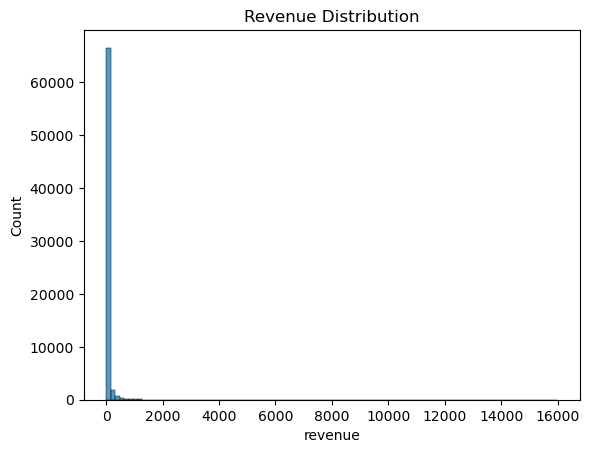

In [9]:
sns.histplot(train['revenue'],bins=100)
plt.title("Revenue Distribution")
plt.show()

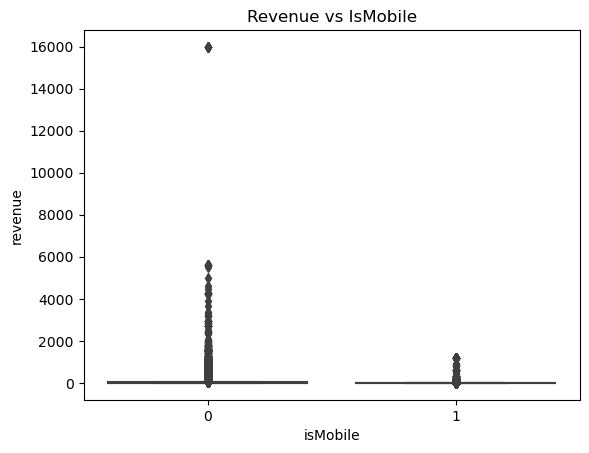

In [10]:
sns.boxplot(x='isMobile',y='revenue',data=train)
plt.title("Revenue vs IsMobile")
plt.show()

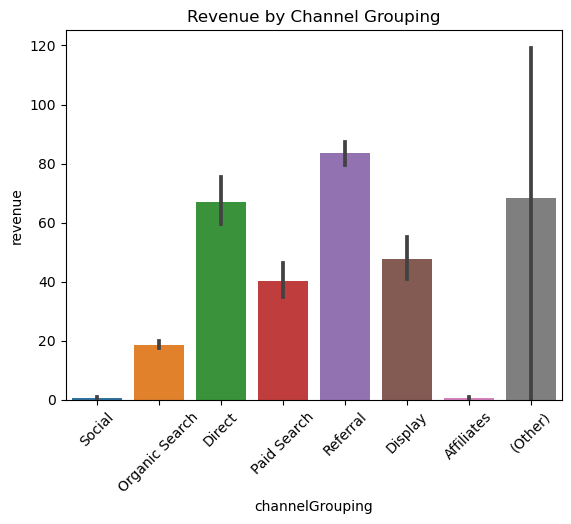

In [11]:
sns.barplot(x='channelGrouping',y='revenue',data=train)
plt.xticks(rotation=45)
plt.title("Revenue by Channel Grouping")
plt.show()

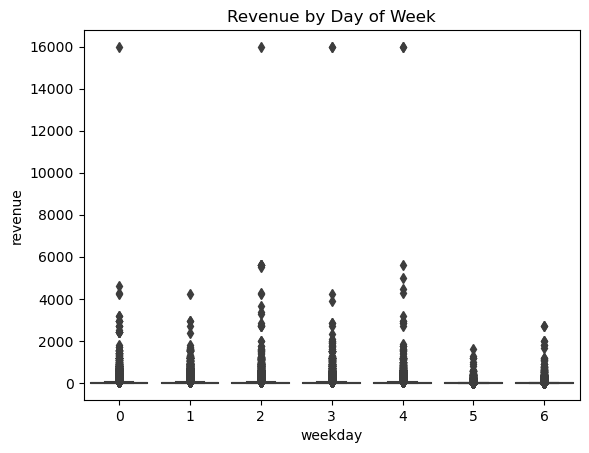

In [12]:
train['weekday'] = train['date'].dt.dayofweek
sns.boxplot(x='weekday',y='revenue',data=train)
plt.title("Revenue by Day of Week")
plt.show()

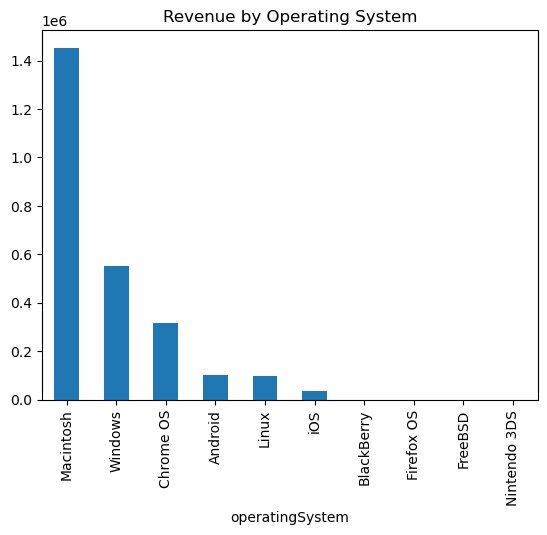

In [13]:
os_rev = train.groupby("operatingSystem")["revenue"].sum().sort_values(ascending=False).head(10)
os_rev.plot(kind='bar',title="Revenue by Operating System")
plt.show()

In [14]:
def feature_engineering(df):
    df['day'] = df['date'].dt.day
    df['month'] = df['date'].dt.month
    df['weekday'] = df['date'].dt.weekday
    le = LabelEncoder()
    for col in ['browser','operatingSystem','channelGrouping']:
        df[col] = le.fit_transform(df[col])
    return df
train = feature_engineering(train)
test = feature_engineering(test)
train.head()

,sessionId,custId,date,channelGrouping,visitStartTime,visitNumber,timeSinceLastVisit,browser,operatingSystem,isMobile,...,adwordsClickInfo.adNetworkType,adwordsClickInfo.isVideoAd,pageviews,bounces,newVisits,revenue,revenue_original,weekday,day,month
0,200000120,1795,2017-04-25,7,1493117200,1,0,6,11,0,...,missing,missing,1.0,1.0,1.0,0.0,0.0,1,25,4
1,400000140,1797,2016-09-04,7,1473037945,1,0,21,6,0,...,missing,missing,1.0,1.0,1.0,0.0,0.0,6,4,9
2,600000160,1799,2016-12-29,4,1483011213,1,0,6,11,0,...,missing,missing,1.0,1.0,1.0,0.0,0.0,3,29,12
3,700000170,1800,2016-08-22,7,1471890172,1,0,21,6,0,...,missing,missing,1.0,1.0,1.0,0.0,0.0,0,22,8
4,800000180,1801,2017-05-18,2,1495146428,1,0,6,0,1,...,missing,missing,6.0,0.0,1.0,0.0,0.0,3,18,5


In [15]:
test.head()

,sessionId,custId,date,channelGrouping,visitStartTime,visitNumber,timeSinceLastVisit,browser,operatingSystem,isMobile,...,adwordsClickInfo.adNetworkType,adwordsClickInfo.isVideoAd,pageviews,bounces,newVisits,revenue,revenue_original,day,month,weekday
0,100000110,1794,2016-10-29,7,1477775021,1,0,5,9,0,...,missing,missing,1.0,1.0,1.0,0.0,0,29,10,5
1,300000130,1796,2016-08-10,7,1470869296,1,0,5,9,0,...,missing,missing,1.0,1.0,1.0,0.0,0,10,8,2
2,500000150,1798,2017-07-17,4,1500305542,1,0,5,9,0,...,missing,missing,5.0,0.0,1.0,0.0,0,17,7,0
3,500000250,1798,2017-07-17,4,1500322111,2,16569,5,9,0,...,missing,missing,3.0,0.0,0.0,0.0,0,17,7,0
4,900000190,1802,2016-10-09,7,1476003570,1,0,18,5,0,...,missing,missing,1.0,1.0,1.0,0.0,0,9,10,6


In [16]:
def aggregate(df):
    return df.groupby("custId").agg({
        "visitNumber": "max",
        "pageviews": "sum",
        "bounces": "sum",
        "newVisits": "sum",
        "revenue": "sum",
        "isMobile": "mean",
        "browser": "first",
        "operatingSystem": "first",
        "channelGrouping": "first",
        "month": "nunique",
        "weekday": "nunique"
    }).reset_index()
train_agg = aggregate(train)
test_agg = aggregate(test)
train_agg.head()

,custId,visitNumber,pageviews,bounces,newVisits,revenue,isMobile,browser,operatingSystem,channelGrouping,month,weekday
0,1795,1,1.0,1.0,1.0,0.0,0.0,6,11,7,1,1
1,1797,1,1.0,1.0,1.0,0.0,0.0,21,6,7,1,1
2,1799,1,1.0,1.0,1.0,0.0,0.0,6,11,4,1,1
3,1800,1,1.0,1.0,1.0,0.0,0.0,21,6,7,1,1
4,1801,1,6.0,0.0,1.0,0.0,1.0,6,0,2,1,1


In [17]:
test_agg.head()

,custId,visitNumber,pageviews,bounces,newVisits,revenue,isMobile,browser,operatingSystem,channelGrouping,month,weekday
0,1794,1,1.0,1.0,1.0,0.0,0.0,5,9,7,1,1
1,1796,1,1.0,1.0,1.0,0.0,0.0,5,9,7,1,1
2,1798,2,8.0,0.0,1.0,0.0,0.0,5,9,4,1,1
3,1802,1,1.0,1.0,1.0,0.0,0.0,18,5,7,1,1
4,1805,1,2.0,0.0,1.0,0.0,0.0,5,9,7,1,1


In [18]:
X = train_agg.drop(["revenue","custId"],axis=1)
y = train_agg["revenue"]
X_test_final = test_agg.drop(["custId"],axis=1)
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.2,random_state=42)
print(X_train.shape)
print(X_val.shape)
print(y_train.shape)
print(y_val.shape)

(37799, 10)
(9450, 10)
(37799,)
(9450,)


In [19]:
models = {
    "RandomForest": RandomForestRegressor(n_estimators=100,max_depth=10),
    "GradientBoosting": GradientBoostingRegressor(n_estimators=100),
    "Ridge": Ridge(alpha=1.0)
}

In [20]:
for name, model in models.items():
    model.fit(X_train,y_train)
    preds = model.predict(X_val)
    print(f"{name} RMSE: {np.sqrt(mean_squared_error(y_val, preds)):.4f}, MAE: {mean_absolute_error(y_val, preds):.4f}, R2: {r2_score(y_val, preds):.4f}")

RandomForest RMSE: 736.6751, MAE: 62.3128, R2: -0.2069
GradientBoosting RMSE: 642.1258, MAE: 57.2752, R2: 0.0830
Ridge RMSE: 605.6327, MAE: 93.0147, R2: 0.1843


In [22]:
dl_model1 = Sequential([
    Dense(64,input_dim=X.shape[1],activation='relu'),
    Dropout(0.3),
    Dense(32,activation='relu'),
    Dense(1)
])
dl_model1.compile(optimizer='adam',loss='mse')
dl_model1.fit(X_train,y_train,epochs=20,batch_size=32,verbose=0)
dl_preds1 = dl_model1.predict(X_val).flatten()
print("DL Model 1 RMSE:", np.sqrt(mean_squared_error(y_val, dl_preds1)))

296/296 [==============================] - 1s 2ms/step
DL Model 1 RMSE: 593.771919725617


In [23]:
dl_model2 = Sequential([
    Dense(128,input_dim=X.shape[1],activation='relu'),
    Dropout(0.4),
    Dense(64,activation='relu'),
    Dropout(0.3),
    Dense(1)
])
dl_model2.compile(optimizer='adam',loss='mse')
dl_model2.fit(X_train,y_train,epochs=20,batch_size=32,verbose=0)
dl_preds2 = dl_model2.predict(X_val).flatten()
print("DL Model 2 RMSE:", np.sqrt(mean_squared_error(y_val, dl_preds2)))

296/296 [==============================] - 1s 2ms/step
DL Model 2 RMSE: 595.3662182178351


In [27]:
drop_cols = [col for col in ['custId', 'revenue', 'predicted_revenue'] if col in test_agg.columns]
X_test_final = test_agg.drop(columns=drop_cols)
X_test_final = X_test_final[X.columns]
final_model = models["GradientBoosting"]
final_model.fit(X, y)
test_preds = final_model.predict(X_test_final)
test_agg["predicted_revenue"] = test_preds
test_final = test.merge(test_agg[["custId", "predicted_revenue"]], on="custId", how="left")

In [28]:
test_final.head()

,sessionId,custId,date,channelGrouping,visitStartTime,visitNumber,timeSinceLastVisit,browser,operatingSystem,isMobile,...,adwordsClickInfo.isVideoAd,pageviews,bounces,newVisits,revenue,revenue_original,day,month,weekday,predicted_revenue
0,100000110,1794,2016-10-29,7,1477775021,1,0,5,9,0,...,missing,1.0,1.0,1.0,0.0,0,29,10,5,1.820305
1,300000130,1796,2016-08-10,7,1470869296,1,0,5,9,0,...,missing,1.0,1.0,1.0,0.0,0,10,8,2,1.820305
2,500000150,1798,2017-07-17,4,1500305542,1,0,5,9,0,...,missing,5.0,0.0,1.0,0.0,0,17,7,0,1.820305
3,500000250,1798,2017-07-17,4,1500322111,2,16569,5,9,0,...,missing,3.0,0.0,0.0,0.0,0,17,7,0,1.820305
4,900000190,1802,2016-10-09,7,1476003570,1,0,18,5,0,...,missing,1.0,1.0,1.0,0.0,0,9,10,6,1.820305


09:11:56 - cmdstanpy - INFO - Chain [1] start processing
09:11:58 - cmdstanpy - INFO - Chain [1] done processing


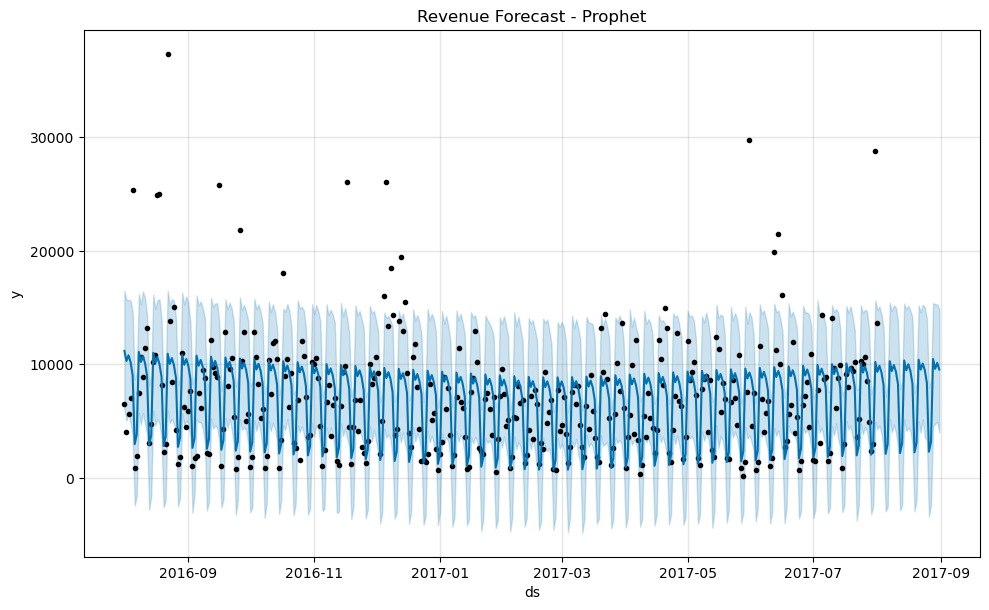

In [29]:
forecast_data = train.groupby("date")["revenue"].sum().reset_index()
forecast_data.columns = ["ds", "y"]
prophet_model = Prophet()
prophet_model.fit(forecast_data)
future = prophet_model.make_future_dataframe(periods=30)
forecast = prophet_model.predict(future)
prophet_model.plot(forecast)
plt.title("Revenue Forecast - Prophet")
plt.show()

In [ ]:
# 9. SIMPLE AI CHATBOT FOR FORECASTING INTERACTION

def chatbot_response(user_input, forecast_df):
    user_input = user_input.lower()
    if "next week" in user_input:
        next_7 = forecast_df[['ds', 'yhat']].tail(7)
        return f"📈 Revenue forecast for next 7 days:\n{next_7.to_string(index=False)}"
    elif "next" in user_input and "days" in user_input:
        days = [int(s) for s in user_input.split() if s.isdigit()]
        if days:
            future_days = forecast_df[['ds', 'yhat']].tail(days[0])
            return f"📅 Revenue forecast for next {days[0]} days:\n{future_days.to_string(index=False)}"
        else:
            return "Please specify how many days you want to forecast."
    elif "highest" in user_input or "peak" in user_input:
        peak = forecast_df[['ds', 'yhat']].tail(30).sort_values(by='yhat', ascending=False).iloc[0]
        return f"🔺 Peak forecasted revenue is on {peak['ds'].date()} with estimated revenue: {peak['yhat']:.2f}"
    elif "plot" in user_input:
        prophet_model.plot(forecast)
        plt.title("Forecasted Revenue (Prophet)")
        plt.show()
        return "📊 Plot displayed above."
    elif "help" in user_input:
        return (
            "🤖 I can answer questions like:\n"
            "- 'Show me the forecast for the next 10 days'\n"
            "- 'What is the peak revenue in the next month?'\n"
            "- 'Plot the forecast'\n"
            "- 'What will the revenue be next week?'\n"
        )
    else:
        return "❓ Sorry, I didn’t understand that. Type 'help' to see what I can do."

# Interactive loop
print("\n🧠 Forecasting Chatbot is ready! Type 'exit' to quit.")
while True:
    user_input = input("You: ")
    if user_input.lower() in ['exit', 'quit']:
        print("👋 Goodbye!")
        break
    response = chatbot_response(user_input, forecast)
    print("Bot:", response)


🧠 Forecasting Chatbot is ready! Type 'exit' to quit.
